In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import glob
import re

# Set up plotting parameters
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

print("🔬 SI Latent Dimension Study - Interpretability Analysis")
print("="*60)


🔬 SI Latent Dimension Study - Interpretability Analysis


In [12]:
def load_latent_dim_metrics(results_dir, latent_dims, seeds):
    """
    Load metrics for all latent dimensions and seeds from the latent dimension study.
    
    Args:
        results_dir: Path to results directory
        latent_dims: List of latent dimensions to analyze
        seeds: List of seeds to analyze
    
    Returns:
        dict: Nested dictionary with metrics for each latent dimension and seed
    """
    
    all_metrics = {}
    
    for latent_dim in latent_dims:
        print(f"\n📐 Processing Latent Dimension: {latent_dim}")
        
        dim_metrics = {
            'accuracy': [],
            'precision': [],
            'correlation': [],
            'covariance': [],
            'kl_divergence': [],
            'seeds_found': []
        }
        
        for seed in seeds:
            # Construct folder name based on your naming convention
            folder_name = f"s1_ep35_lr5_la1_seed{seed}_ldim{latent_dim}_s2_lr6_la4_lc1_lcon8"
            folder_path = results_dir / folder_name
            
            if folder_path.exists():
                print(f"   🌱 Seed {seed}: ✅ Found")
                dim_metrics['seeds_found'].append(seed)
                
                try:
                    # Load confusion matrix for accuracy and precision
                    cm_files = list(folder_path.glob("confusion_matrix_values_epoch_*.npy"))
                    if cm_files:
                        latest_cm = max(cm_files, key=lambda x: int(x.stem.split('_')[-1]))
                        conf_matrix = np.load(latest_cm)
                        
                        # Calculate accuracy (mean diagonal)
                        accuracy = np.mean(np.diag(conf_matrix))
                        dim_metrics['accuracy'].append(accuracy)
                        
                        # Calculate precision (class 0)
                        if conf_matrix[0,0] + conf_matrix[1,0] > 0:
                            precision = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[1,0])
                            dim_metrics['precision'].append(precision)
                        
                        print(f"        - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")
                    
                    # Load correlation matrix
                    corr_files = list(folder_path.glob("latent_correlation_matrix_epoch_*.npy"))
                    if corr_files:
                        latest_corr = max(corr_files, key=lambda x: int(x.stem.split('_')[-1]))
                        corr_matrix = np.load(latest_corr)
                        
                        # Calculate mean absolute off-diagonal correlation
                        if corr_matrix.shape[0] > 1:
                            off_diag_mask = ~np.eye(corr_matrix.shape[0], dtype=bool)
                            mean_corr = np.mean(np.abs(corr_matrix[off_diag_mask]))
                            dim_metrics['correlation'].append(mean_corr)
                            print(f"        - Correlation: {mean_corr:.4f}")
                    
                    # Load covariance matrix
                    cov_files = list(folder_path.glob("latent_covariance_matrix_epoch_*.npy"))
                    if cov_files:
                        latest_cov = max(cov_files, key=lambda x: int(x.stem.split('_')[-1]))
                        cov_matrix = np.load(latest_cov)
                        
                        # Calculate mean absolute off-diagonal covariance
                        if cov_matrix.shape[0] > 1:
                            off_diag_mask = ~np.eye(cov_matrix.shape[0], dtype=bool)
                            mean_cov = np.mean(np.abs(cov_matrix[off_diag_mask]))
                            dim_metrics['covariance'].append(mean_cov)
                            print(f"        - Covariance: {mean_cov:.4f}")
                    
                    # Load KL divergences
                    kl_files = list(folder_path.glob("kl_divergences_epoch_*.npy"))
                    if kl_files:
                        latest_kl = max(kl_files, key=lambda x: int(x.stem.split('_')[-1]))
                        kl_divergences = np.load(latest_kl)
                        avg_kl = np.mean(kl_divergences)
                        dim_metrics['kl_divergence'].append(avg_kl)
                        print(f"        - KL Divergence: {avg_kl:.4f}")
                        
                except Exception as e:
                    print(f"        ❌ Error loading metrics: {e}")
            else:
                print(f"   🌱 Seed {seed}: ❌ Missing")
        
        all_metrics[latent_dim] = dim_metrics
        n_seeds = len(dim_metrics['seeds_found'])
        print(f"   📊 Summary: {n_seeds}/{len(seeds)} seeds found")
    
    return all_metrics

# Define parameters
results_dir = Path("../../results/latent_dim_study")
latent_dims = [3, 4, 5, 6, 7, 8, 9, 10, 13] #, 20, 30, 50, 100, 400
seeds = [42, 44]

print(f"📂 Loading metrics from: {results_dir}")
print(f"🎯 Target latent dimensions: {latent_dims}")
print(f"🌱 Seeds to analyze: {seeds}")

# Load all metrics
all_metrics = load_latent_dim_metrics(results_dir, latent_dims, seeds)


📂 Loading metrics from: ../../results/latent_dim_study
🎯 Target latent dimensions: [3, 4, 5, 6, 7, 8, 9, 10, 13]
🌱 Seeds to analyze: [42, 44]

📐 Processing Latent Dimension: 3
   🌱 Seed 42: ✅ Found
        - Accuracy: 0.6961, Precision: 0.7022
        - Correlation: 0.1370
        - Covariance: 0.1330
        - KL Divergence: 0.1110
   🌱 Seed 44: ✅ Found
        - Accuracy: 0.7112, Precision: 0.7111
        - Correlation: 0.6332
        - Covariance: 0.4954
        - KL Divergence: 0.1952
   📊 Summary: 2/2 seeds found

📐 Processing Latent Dimension: 4
   🌱 Seed 42: ✅ Found
        - Accuracy: 0.7205, Precision: 0.7371
        - Correlation: 0.3531
        - Covariance: 0.1972
        - KL Divergence: 0.1879
   🌱 Seed 44: ✅ Found
        - Accuracy: 0.7238, Precision: 0.7092
        - Correlation: 0.3123
        - Covariance: 0.1361
        - KL Divergence: 0.1682
   📊 Summary: 2/2 seeds found

📐 Processing Latent Dimension: 5
   🌱 Seed 42: ✅ Found
        - Accuracy: 0.7133, Precision:

In [13]:
def calculate_mean_std_metrics(all_metrics, latent_dims):
    """Calculate mean and std for each metric across seeds."""
    
    results = {
        'latent_dims': [],
        'mean_accuracy': [],
        'std_accuracy': [],
        'mean_precision': [],
        'std_precision': [],
        'mean_correlation': [],
        'std_correlation': [],
        'mean_covariance': [],
        'std_covariance': [],
        'mean_kl_divergence': [],
        'std_kl_divergence': []
    }
    
    for latent_dim in latent_dims:
        if latent_dim in all_metrics:
            metrics = all_metrics[latent_dim]
            
            # Only include dimensions with at least some data
            if len(metrics['seeds_found']) > 0:
                results['latent_dims'].append(latent_dim)
                
                # Calculate means and stds for each metric
                for metric_name in ['accuracy', 'precision', 'correlation', 'covariance', 'kl_divergence']:
                    values = metrics[metric_name]
                    if values:
                        mean_val = np.mean(values)
                        std_val = np.std(values, ddof=1) if len(values) > 1 else 0
                    else:
                        mean_val = np.nan
                        std_val = np.nan
                    
                    results[f'mean_{metric_name}'].append(mean_val)
                    results[f'std_{metric_name}'].append(std_val)
    
    return results

# Calculate summary statistics
print("\n📊 Calculating mean and standard deviation across seeds...")
summary_stats = calculate_mean_std_metrics(all_metrics, latent_dims)

# Display summary
print(f"\n✅ Successfully processed {len(summary_stats['latent_dims'])} latent dimensions:")
for i, ldim in enumerate(summary_stats['latent_dims']):
    acc = summary_stats['mean_accuracy'][i]
    prec = summary_stats['mean_precision'][i]
    corr = summary_stats['mean_correlation'][i]
    print(f"  - Dim {ldim}: Accuracy={acc:.3f}, Precision={prec:.3f}, Correlation={corr:.3f}")

print("\n🎯 Ready to create plots!")



📊 Calculating mean and standard deviation across seeds...

✅ Successfully processed 9 latent dimensions:
  - Dim 3: Accuracy=0.704, Precision=0.707, Correlation=0.385
  - Dim 4: Accuracy=0.722, Precision=0.723, Correlation=0.333
  - Dim 5: Accuracy=0.722, Precision=0.734, Correlation=0.249
  - Dim 6: Accuracy=0.735, Precision=0.734, Correlation=0.465
  - Dim 7: Accuracy=0.719, Precision=0.720, Correlation=0.333
  - Dim 8: Accuracy=0.700, Precision=0.726, Correlation=0.586
  - Dim 9: Accuracy=0.705, Precision=0.707, Correlation=0.503
  - Dim 10: Accuracy=0.700, Precision=0.714, Correlation=0.362
  - Dim 13: Accuracy=0.727, Precision=0.725, Correlation=0.487

🎯 Ready to create plots!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


📈 Creating Plot 1: Precision over Latent Dimensions


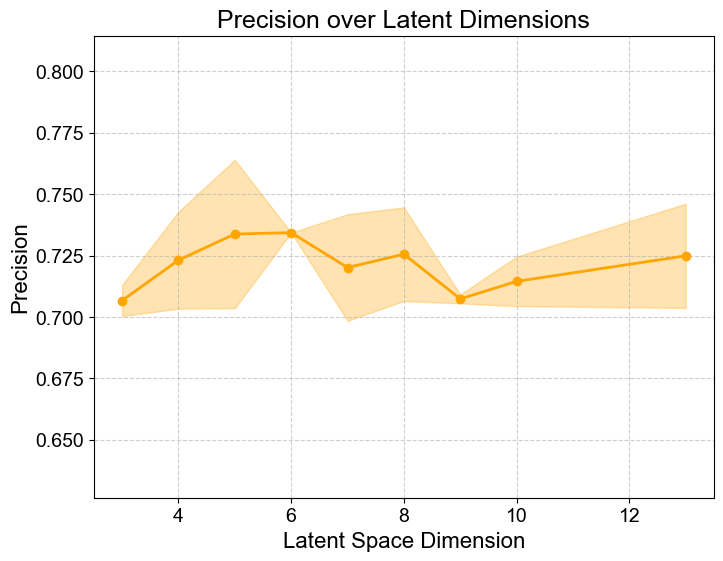

✅ Precision plot saved with 9 data points


In [14]:
# PLOT 1: Model Performance - Precision over Latent Dimensions
print("📈 Creating Plot 1: Precision over Latent Dimensions")

plt.figure(figsize=(8, 6))

# Extract data
dims = summary_stats['latent_dims']
mean_precisions = summary_stats['mean_precision']
std_precisions = summary_stats['std_precision']

# Remove any NaN values for plotting
valid_indices = [i for i, (mean, std) in enumerate(zip(mean_precisions, std_precisions)) 
                 if not (np.isnan(mean) or np.isnan(std))]

if valid_indices:
    plot_dims = [dims[i] for i in valid_indices]
    plot_means = [mean_precisions[i] for i in valid_indices]
    plot_stds = [std_precisions[i] for i in valid_indices]
    
    # Precision (orange) - matching your reference style
    plt.plot(plot_dims, plot_means, color='orange', linewidth=2, label='Precision', marker='o', markersize=6)
    plt.fill_between(plot_dims, 
                     np.array(plot_means) - np.array(plot_stds), 
                     np.array(plot_means) + np.array(plot_stds),
                     color='orange', alpha=0.3)
    
    # Formatting to match your reference
    plt.xlabel("Latent Space Dimension", fontsize=16, fontname="Arial")
    plt.ylabel("Precision", fontsize=16, fontname="Arial")
    plt.title("Precision over Latent Dimensions", fontsize=18, fontname="Arial")
    plt.xticks(fontsize=14, fontname="Arial")
    plt.yticks(fontsize=14, fontname="Arial")
    
    # Set reasonable y-axis range
    y_min = max(0.1, min(plot_means) - max(plot_stds) - 0.05)
    y_max = min(1.0, max(plot_means) + max(plot_stds) + 0.05)
    plt.ylim(y_min, y_max)
    
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Save the figure
    plt.savefig("../../results/latent_dim_precision.png", dpi=300, bbox_inches="tight")
    plt.savefig("../../results/latent_dim_precision.eps", dpi=300, bbox_inches="tight")
    
    plt.show()
    
    print(f"✅ Precision plot saved with {len(plot_dims)} data points")
else:
    print("❌ No valid precision data found for plotting")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


📈 Creating Plot 2: Accuracy over Latent Dimensions


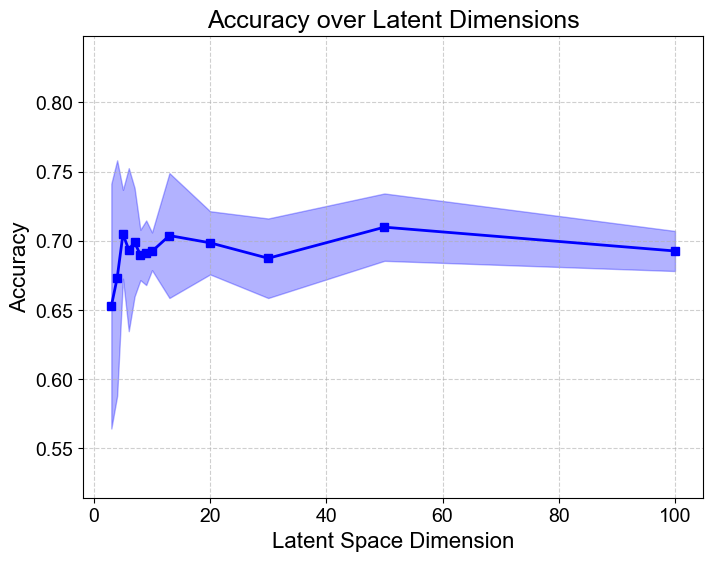

✅ Accuracy plot saved with 13 data points


In [5]:
# PLOT 2: Model Performance - Accuracy over Latent Dimensions
print("📈 Creating Plot 2: Accuracy over Latent Dimensions")

plt.figure(figsize=(8, 6))

# Extract data
mean_accuracies = summary_stats['mean_accuracy']
std_accuracies = summary_stats['std_accuracy']

# Remove any NaN values for plotting
valid_indices = [i for i, (mean, std) in enumerate(zip(mean_accuracies, std_accuracies)) 
                 if not (np.isnan(mean) or np.isnan(std))]

if valid_indices:
    plot_dims = [dims[i] for i in valid_indices]
    plot_means = [mean_accuracies[i] for i in valid_indices]
    plot_stds = [std_accuracies[i] for i in valid_indices]
    
    # Accuracy (blue) 
    plt.plot(plot_dims, plot_means, color='blue', linewidth=2, label='Accuracy', marker='s', markersize=6)
    plt.fill_between(plot_dims, 
                     np.array(plot_means) - np.array(plot_stds), 
                     np.array(plot_means) + np.array(plot_stds),
                     color='blue', alpha=0.3)
    
    # Formatting
    plt.xlabel("Latent Space Dimension", fontsize=16, fontname="Arial")
    plt.ylabel("Accuracy", fontsize=16, fontname="Arial")
    plt.title("Accuracy over Latent Dimensions", fontsize=18, fontname="Arial")
    plt.xticks(fontsize=14, fontname="Arial")
    plt.yticks(fontsize=14, fontname="Arial")
    
    # Set reasonable y-axis range
    y_min = max(0.1, min(plot_means) - max(plot_stds) - 0.05)
    y_max = min(1.0, max(plot_means) + max(plot_stds) + 0.05)
    plt.ylim(y_min, y_max)
    
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Save the figure
    plt.savefig("../../results/latent_dim_accuracy.png", dpi=300, bbox_inches="tight")
    plt.savefig("../../results/latent_dim_accuracy.eps", dpi=300, bbox_inches="tight")
    
    plt.show()
    
    print(f"✅ Accuracy plot saved with {len(plot_dims)} data points")
else:
    print("❌ No valid accuracy data found for plotting")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


📈 Creating Plot 3: Feature Correlation over Latent Dimensions


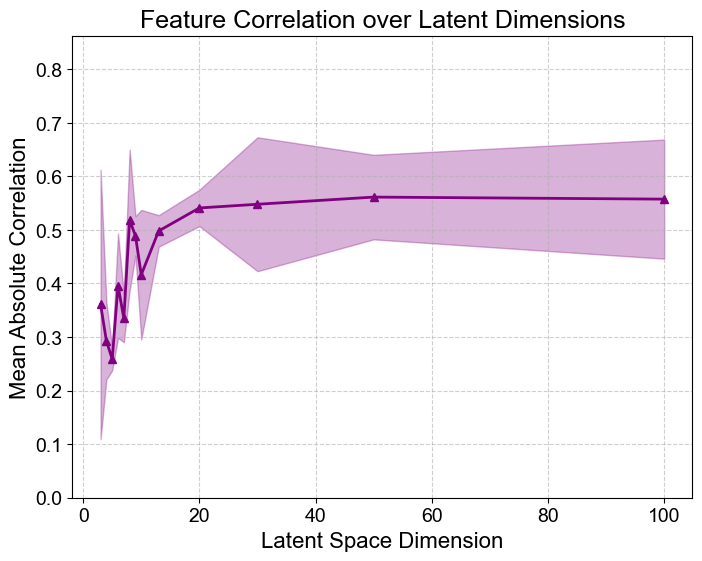

✅ Feature correlation plot saved with 13 data points
📝 Note: Lower correlation values indicate better feature independence


In [6]:
# PLOT 3: Feature Correlation over Latent Dimensions
print("📈 Creating Plot 3: Feature Correlation over Latent Dimensions")

plt.figure(figsize=(8, 6))

# Extract data
mean_correlations = summary_stats['mean_correlation']
std_correlations = summary_stats['std_correlation']

# Remove any NaN values for plotting
valid_indices = [i for i, (mean, std) in enumerate(zip(mean_correlations, std_correlations)) 
                 if not (np.isnan(mean) or np.isnan(std))]

if valid_indices:
    plot_dims = [dims[i] for i in valid_indices]
    plot_means = [mean_correlations[i] for i in valid_indices]
    plot_stds = [std_correlations[i] for i in valid_indices]
    
    # Feature Correlation (purple)
    plt.plot(plot_dims, plot_means, color='purple', linewidth=2, label='Feature Correlation', marker='^', markersize=6)
    plt.fill_between(plot_dims, 
                     np.array(plot_means) - np.array(plot_stds), 
                     np.array(plot_means) + np.array(plot_stds),
                     color='purple', alpha=0.3)
    
    # Formatting
    plt.xlabel("Latent Space Dimension", fontsize=16, fontname="Arial")
    plt.ylabel("Mean Absolute Correlation", fontsize=16, fontname="Arial")
    plt.title("Feature Correlation over Latent Dimensions", fontsize=18, fontname="Arial")
    plt.xticks(fontsize=14, fontname="Arial")
    plt.yticks(fontsize=14, fontname="Arial")
    
    # Set reasonable y-axis range (correlation is typically 0-1)
    y_min = max(0.0, min(plot_means) - max(plot_stds) - 0.05)
    y_max = min(1.0, max(plot_means) + max(plot_stds) + 0.05)
    plt.ylim(y_min, y_max)
    
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Save the figure
    plt.savefig("../../results/latent_dim_correlation.png", dpi=300, bbox_inches="tight")
    plt.savefig("../../results/latent_dim_correlation.eps", dpi=300, bbox_inches="tight")
    
    plt.show()
    
    print(f"✅ Feature correlation plot saved with {len(plot_dims)} data points")
    print("📝 Note: Lower correlation values indicate better feature independence")
else:
    print("❌ No valid correlation data found for plotting")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


📈 Creating Plot 4: Feature Covariance over Latent Dimensions


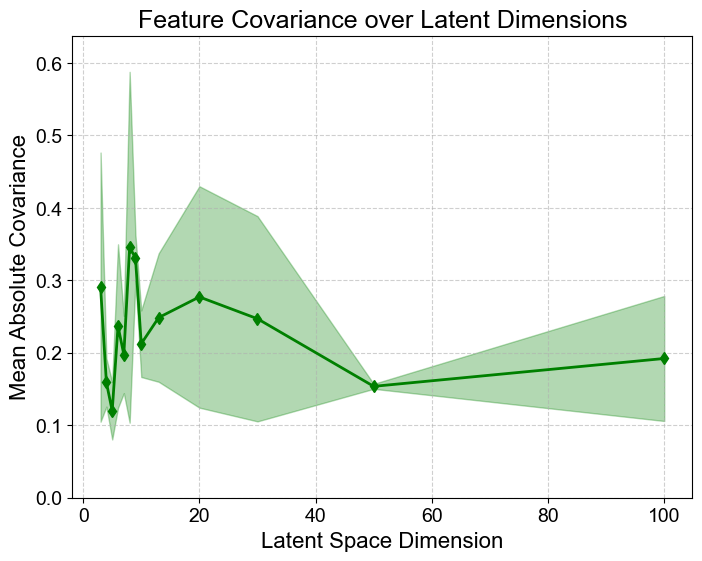

✅ Feature covariance plot saved with 13 data points
📝 Note: Lower covariance values indicate better feature independence


In [7]:
# PLOT 4: Feature Covariance over Latent Dimensions
print("📈 Creating Plot 4: Feature Covariance over Latent Dimensions")

plt.figure(figsize=(8, 6))

# Extract data
mean_covariances = summary_stats['mean_covariance']
std_covariances = summary_stats['std_covariance']

# Remove any NaN values for plotting
valid_indices = [i for i, (mean, std) in enumerate(zip(mean_covariances, std_covariances)) 
                 if not (np.isnan(mean) or np.isnan(std))]

if valid_indices:
    plot_dims = [dims[i] for i in valid_indices]
    plot_means = [mean_covariances[i] for i in valid_indices]
    plot_stds = [std_covariances[i] for i in valid_indices]
    
    # Feature Covariance (green)
    plt.plot(plot_dims, plot_means, color='green', linewidth=2, label='Feature Covariance', marker='d', markersize=6)
    plt.fill_between(plot_dims, 
                     np.array(plot_means) - np.array(plot_stds), 
                     np.array(plot_means) + np.array(plot_stds),
                     color='green', alpha=0.3)
    
    # Formatting
    plt.xlabel("Latent Space Dimension", fontsize=16, fontname="Arial")
    plt.ylabel("Mean Absolute Covariance", fontsize=16, fontname="Arial")
    plt.title("Feature Covariance over Latent Dimensions", fontsize=18, fontname="Arial")
    plt.xticks(fontsize=14, fontname="Arial")
    plt.yticks(fontsize=14, fontname="Arial")
    
    # Set reasonable y-axis range 
    y_min = max(0.0, min(plot_means) - max(plot_stds) - 0.05)
    y_max = max(plot_means) + max(plot_stds) + 0.05
    plt.ylim(y_min, y_max)
    
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Save the figure
    plt.savefig("../../results/latent_dim_covariance.png", dpi=300, bbox_inches="tight")
    plt.savefig("../../results/latent_dim_covariance.eps", dpi=300, bbox_inches="tight")
    
    plt.show()
    
    print(f"✅ Feature covariance plot saved with {len(plot_dims)} data points")
    print("📝 Note: Lower covariance values indicate better feature independence")
else:
    print("❌ No valid covariance data found for plotting")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


📈 Creating Bonus Plot: KL Divergence over Latent Dimensions


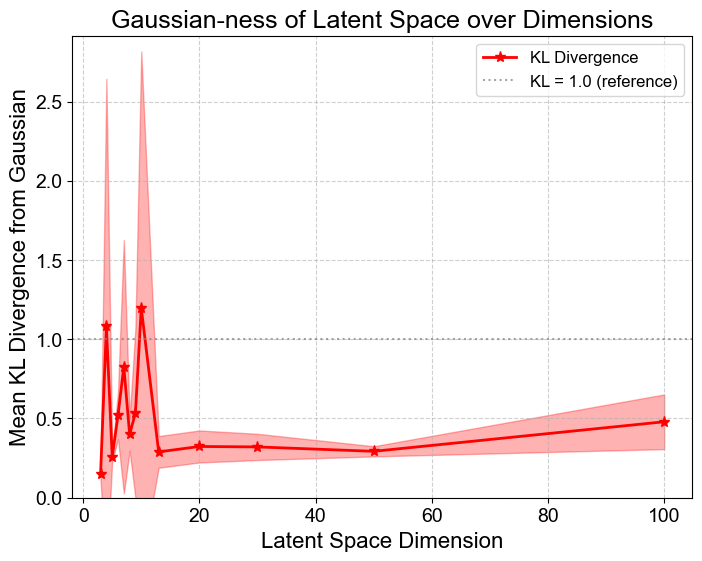

✅ KL divergence plot saved with 13 data points
📝 Note: Lower KL divergence values indicate better Gaussian approximation


In [8]:
# BONUS PLOT: KL Divergence over Latent Dimensions (Gaussian-ness measure)
print("📈 Creating Bonus Plot: KL Divergence over Latent Dimensions")

plt.figure(figsize=(8, 6))

# Extract data
mean_kl_divergences = summary_stats['mean_kl_divergence']
std_kl_divergences = summary_stats['std_kl_divergence']

# Remove any NaN values for plotting
valid_indices = [i for i, (mean, std) in enumerate(zip(mean_kl_divergences, std_kl_divergences)) 
                 if not (np.isnan(mean) or np.isnan(std))]

if valid_indices:
    plot_dims = [dims[i] for i in valid_indices]
    plot_means = [mean_kl_divergences[i] for i in valid_indices]
    plot_stds = [std_kl_divergences[i] for i in valid_indices]
    
    # KL Divergence (red)
    plt.plot(plot_dims, plot_means, color='red', linewidth=2, label='KL Divergence', marker='*', markersize=8)
    plt.fill_between(plot_dims, 
                     np.array(plot_means) - np.array(plot_stds), 
                     np.array(plot_means) + np.array(plot_stds),
                     color='red', alpha=0.3)
    
    # Formatting
    plt.xlabel("Latent Space Dimension", fontsize=16, fontname="Arial")
    plt.ylabel("Mean KL Divergence from Gaussian", fontsize=16, fontname="Arial")
    plt.title("Gaussian-ness of Latent Space over Dimensions", fontsize=18, fontname="Arial")
    plt.xticks(fontsize=14, fontname="Arial")
    plt.yticks(fontsize=14, fontname="Arial")
    
    # Set reasonable y-axis range 
    y_min = max(0.0, min(plot_means) - max(plot_stds) - 0.1)
    y_max = max(plot_means) + max(plot_stds) + 0.1
    plt.ylim(y_min, y_max)
    
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Add horizontal line at KL=1 for reference
    plt.axhline(y=1.0, color='gray', linestyle=':', alpha=0.7, label='KL = 1.0 (reference)')
    plt.legend(fontsize=12)
    
    # Save the figure
    plt.savefig("../../results/latent_dim_kl_divergence.png", dpi=300, bbox_inches="tight")
    plt.savefig("../../results/latent_dim_kl_divergence.eps", dpi=300, bbox_inches="tight")
    
    plt.show()
    
    print(f"✅ KL divergence plot saved with {len(plot_dims)} data points")
    print("📝 Note: Lower KL divergence values indicate better Gaussian approximation")
else:
    print("❌ No valid KL divergence data found for plotting")


In [ ]:
# SUMMARY TABLE: Create a comprehensive summary table
print("\n📊 Creating Summary Table of All Metrics")

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Latent_Dimension': summary_stats['latent_dims'],
    'Accuracy_Mean': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['mean_accuracy']],
    'Accuracy_Std': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['std_accuracy']],
    'Precision_Mean': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['mean_precision']],
    'Precision_Std': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['std_precision']],
    'Correlation_Mean': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['mean_correlation']],
    'Correlation_Std': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['std_correlation']],
    'Covariance_Mean': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['mean_covariance']],
    'Covariance_Std': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['std_covariance']],
    'KL_Divergence_Mean': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['mean_kl_divergence']],
    'KL_Divergence_Std': [f"{x:.3f}" if not np.isnan(x) else "N/A" for x in summary_stats['std_kl_divergence']]
})

print("\n🎯 LATENT DIMENSION STUDY SUMMARY TABLE")
print("="*100)
print(summary_df.to_string(index=False))

# Save as CSV
csv_path = "../../results/latent_dimension_study_summary.csv"
summary_df.to_csv(csv_path, index=False)
print(f"\n💾 Summary table saved as: {csv_path}")

print(f"\n✅ Analysis Complete!")
print(f"📈 Generated 4 plots: Precision, Accuracy, Correlation, Covariance, KL Divergence")
print(f"📊 Processed {len(summary_stats['latent_dims'])} latent dimensions")
print(f"🌱 Analyzed data from {len(seeds)} seeds per dimension")
print(f"\n📁 All plots and data saved to: ../../results/")

# Print key insights
print(f"\n🔍 KEY INSIGHTS:")
if not all(np.isnan(summary_stats['mean_precision'])):
    best_precision_idx = np.nanargmax(summary_stats['mean_precision'])
    best_precision_dim = summary_stats['latent_dims'][best_precision_idx]
    best_precision_val = summary_stats['mean_precision'][best_precision_idx]
    print(f"   • Best Precision: Dimension {best_precision_dim} ({best_precision_val:.3f})")

if not all(np.isnan(summary_stats['mean_correlation'])):
    best_correlation_idx = np.nanargmin(summary_stats['mean_correlation'])  # Lower is better
    best_correlation_dim = summary_stats['latent_dims'][best_correlation_idx]
    best_correlation_val = summary_stats['mean_correlation'][best_correlation_idx]
    print(f"   • Best Independence (lowest correlation): Dimension {best_correlation_dim} ({best_correlation_val:.3f})")

if not all(np.isnan(summary_stats['mean_kl_divergence'])):
    best_gaussian_idx = np.nanargmin(summary_stats['mean_kl_divergence'])  # Lower is better
    best_gaussian_dim = summary_stats['latent_dims'][best_gaussian_idx]
    best_gaussian_val = summary_stats['mean_kl_divergence'][best_gaussian_idx]
    print(f"   • Most Gaussian (lowest KL): Dimension {best_gaussian_dim} ({best_gaussian_val:.3f})")
